[link](https://github.com/tansey/rl-tictactoe/blob/master/tictactoe.py)

In [1]:
%matplotlib inline
import random
from copy import copy, deepcopy
import itertools
import csv
import matplotlib.pyplot as plt
import random

/Users/Sophia/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


I'm going to define a board as a list that contains 9 characters, where the first character corresponds to 0,0, the second to 0,1 and so on. The empty character will be the _. 

Now, let's write a function to check if a particular gamestate is a winning gamestate, and if so, for which player. 

In [2]:
def isWinningGamestate(gamestate):
    possibleWaysToWin = [
        [0,1,2],
        [3,4,5],
        [6,7,8],
        [0,3,6],
        [1,4,7],
        [2,5,8],
        [0,4,8],
        [6,4,2],
    ]
    numWinners = 0
    winner = ''
    for poss in possibleWaysToWin:
        if ((gamestate[poss[0]] != '_') and
            (gamestate[poss[0]] == gamestate[poss[1]]) and 
            (gamestate[poss[1]] == gamestate[poss[2]])):
            numWinners+= 1
            winner = gamestate[poss[0]]
    
    return (numWinners, winner)

Now, let's create a function that creates the game state table. 

Note: this function assumes that Os always go first. 

Additionally, we're going to do this by creating all possible combinations of Os, Xs, and underscores, and then filtering out all impossible game states.

In [29]:
def createGameStateTable (player):
    allStates = list(itertools.product(['X','O','_'], repeat =9))
    gameStateTable = {}
    for state in allStates:
        stateStr = ''.join(state)
        
        Xcount = state.count('X')
        Ocount = state.count('O')     
        
        if ((Xcount == Ocount) or ((Xcount - 1) == Ocount)):
            numWinners,winner = isWinningGamestate(state)
            if (numWinners == 0):
                blankCount = state.count('_')
                if (blankCount == 0):
                    gameStateTable[stateStr] = 0
                else:
                    gameStateTable[stateStr] = 0.5
            elif (numWinners == 1):
                gameStateTable[stateStr] = int(winner==player)
    return gameStateTable

In [30]:
createGameStateTable('X')

{'XOOOOXXX_': 0.5,
 'XOOOOXXXX': 1,
 'OXX_X_XOO': 1,
 'OO_XO__XX': 0.5,
 'XXOXX__OO': 0.5,
 'O_OX____X': 0.5,
 '__OOX_OXX': 0.5,
 '_X____OOX': 0.5,
 '_____XXO_': 0.5,
 'XXO_OOXX_': 0.5,
 '_O_X_XX_O': 0.5,
 'XXO_OOXXO': 0,
 'OXOO_X__X': 0.5,
 'X_O__XX_O': 0.5,
 'O_XO_O_XX': 0.5,
 'OXX___OX_': 0.5,
 'O_X__OX_X': 0.5,
 'O_X__OX__': 0.5,
 'XOXX_OO_X': 0.5,
 'OXX___OXO': 0.5,
 'XOXX_OO__': 0.5,
 '_OOXXOXOX': 0.5,
 'OOXO__X_X': 0.5,
 'O_OX_X___': 0.5,
 'O_OX_X__X': 0.5,
 '_OXXXO_O_': 0.5,
 '_OXXXO_OX': 0.5,
 'OXXX_OOOX': 0.5,
 'XOXO_XX_O': 0.5,
 'XO_O___XX': 0.5,
 '__OOX__X_': 0.5,
 'O_XO_XX__': 0.5,
 '__OXXO___': 0.5,
 'XX_X__OOO': 0,
 '__OOX__XX': 0.5,
 '__O_XOXXO': 0,
 '_XXOOO_XX': 0,
 'O_XO_XX_O': 0.5,
 'XX_X__OO_': 0.5,
 'O_OXXOXXO': 0,
 'O_XXXOXO_': 1,
 'OX_OXXXO_': 0.5,
 'O_OXXOXX_': 0.5,
 'O_XXXOXOO': 1,
 '_XO_O__X_': 0.5,
 'OX_OXXXOO': 0.5,
 'O___XOXOX': 0.5,
 'O____XOX_': 0.5,
 'O____XOXX': 0.5,
 'OX_X___XO': 0.5,
 '__X_OXO__': 0.5,
 'O___OXX_X': 0.5,
 'O___OXX__': 0.5,
 '__X_OXO_X

Now that we've initialized our table, let's write a function that given a current game state and a player whose turn it is, gives us all the possible next game states. 

In [5]:
def getNextGameStates (gameState, player):
    blankSpots = [i for i,slot in enumerate(gameState) if slot=='_']
    
    nextStates = []
    for blankSpot in blankSpots:
        tempNextState = copy(gameState)
        tempNextState[blankSpot] = player
        nextStates.append(tempNextState)
    
    return nextStates

In [6]:
getNextGameStates(['_']*9,'X')

[['X', '_', '_', '_', '_', '_', '_', '_', '_'],
 ['_', 'X', '_', '_', '_', '_', '_', '_', '_'],
 ['_', '_', 'X', '_', '_', '_', '_', '_', '_'],
 ['_', '_', '_', 'X', '_', '_', '_', '_', '_'],
 ['_', '_', '_', '_', 'X', '_', '_', '_', '_'],
 ['_', '_', '_', '_', '_', 'X', '_', '_', '_'],
 ['_', '_', '_', '_', '_', '_', 'X', '_', '_'],
 ['_', '_', '_', '_', '_', '_', '_', 'X', '_'],
 ['_', '_', '_', '_', '_', '_', '_', '_', 'X']]

Now, let's try to play a game. For now, let's have the computer learn to play against a player that randomly places game pieces

In [36]:
#Initialize the board
board = ['_']*9
Players = ['O','X']
playerTurn = 0
statesDict = createGameStateTable('X')
numWinners, winner = isWinningGamestate(board)

#keeping track variables for the learner
lastLearningBoard = ''.join(['_']*9)
adjustWeightFactor = 0.5



while (numWinners == 0):
    print board
    # O's Turn... Move Randomly
    if (playerTurn == 1):
        playerTurn = 0
        blankSpots = [i for i,slot in enumerate(board) if slot=='_']
        
        placeToMove = random.choice(blankSpots)
        board[placeToMove] = 'O'
       
    else:
        playerTurn = 1
        #Get all the next possible game states
        possStates = getNextGameStates(board, 'X')
        possWinning = []
        #Get the possibilities of winning for the next state
        for possState in possStates:
            stateStr = ''.join(possState)
            possWinning.append(statesDict[stateStr])
            
        #Get the best move by our probability of winning
        bestMove = possStates[possWinning.index(max(possWinning))]

        #Get the rest of the moves
        possStates.remove(bestMove)
            
        #Are we being exploratory?
        isExploratory = random.random() > 0.8
        
        if (isExploratory):
            #Exploratory behavior
            #Choose the state with the best likelihood of winnning
            board = list(random.choice(possStates))
            
        else:
            board = bestMove
            
            oldProbW = statesDict[lastLearningBoard]
            newProbW = statesDict[''.join(bestMove)]
            statesDict[lastLearningBoard] += adjustWeightFactor*(newProbW - oldProbW)
            print lastLearningBoard, statesDict[lastLearningBoard]
                    
            lastLearningBoard = ''.join(bestMove)
   
     
    numWinners, winner = isWinningGamestate(board)
    
print board  
print "winner", winner

['_', '_', '_', '_', '_', '_', '_', '_', '_']
_________ 0.5
['X', '_', '_', '_', '_', '_', '_', '_', '_']
['X', '_', '_', '_', '_', '_', 'O', '_', '_']
['X', '_', 'X', '_', '_', '_', 'O', '_', '_']
['X', '_', 'X', '_', '_', '_', 'O', '_', 'O']
X________ 0.75
['X', 'X', 'X', '_', '_', '_', 'O', '_', 'O']
winner X


Now, let's play tons of games!

In [37]:
statesDict = createGameStateTable('X')
winningPercentage = []

for j in range(100000):
    #Initialize the board
    board = ['_']*9
    Players = ['O','X']
    playerTurn = 0
    numWinners, winner = isWinningGamestate(board)

    #keeping track variables for the learner
    lastLearningBoard = ''.join(['_']*9)
    adjustWeightFactor = 0.5



    while ((numWinners == 0) and board.count('_') > 0):
        # O's Turn... Move Randomly
        if (playerTurn == 0):
            playerTurn = 1
            blankSpots = [i for i,slot in enumerate(board) if slot=='_']

            placeToMove = random.choice(blankSpots)
            board[placeToMove] = 'O'

        else:
            playerTurn = 0
            #Get all the next possible game states
            possStates = getNextGameStates(board, 'X')
            possWinning = []
            #Get the possibilities of winning for the next state
            for possState in possStates:
                stateStr = ''.join(possState)
                possWinning.append(statesDict[stateStr])

            #Get the best move by our probability of winning
            bestMove = possStates[possWinning.index(max(possWinning))]

            #Get the rest of the moves
            possStates.remove(bestMove)

            #Are we being exploratory?
            isExploratory = random.random() > 0.8

            if (isExploratory):
                #Exploratory behavior
                #Choose the state with the best likelihood of winnning
                board = list(random.choice(possStates))

            else:
                board = bestMove

                oldProbW = statesDict[lastLearningBoard]
                newProbW = statesDict[''.join(bestMove)]
                statesDict[lastLearningBoard] += adjustWeightFactor*(newProbW - oldProbW)

                lastLearningBoard = ''.join(bestMove)


        numWinners, winner = isWinningGamestate(board)

    if (j == 0):
        winningPercentage.append(int(winner=='X'))
    else:
        prevWinning = winningPercentage[j-1]
        newWinning = (prevWinning*(j) + int(winner=='X'))/(float(j+1))
        winningPercentage.append(newWinning)

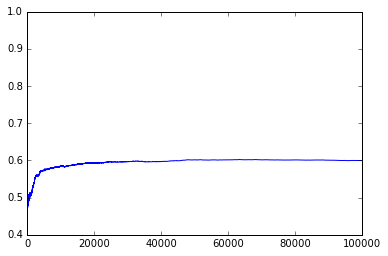

In [32]:
plt.plot(winningPercentage)

In [33]:
statesDict

{'XOOOOXXX_': 0.5,
 'XOOOOXXXX': 1,
 'OXX_X_XOO': 1,
 'OO_XO__XX': 0.5,
 'XXOXX__OO': 0.5,
 'O_OX____X': 0.5,
 '__OOX_OXX': 0.5,
 '_X____OOX': 0.5,
 '_____XXO_': 0.5,
 'XXO_OOXX_': 0.5,
 '_O_X_XX_O': 0.5,
 'XXO_OOXXO': 0,
 'OXOO_X__X': 0.5,
 'X_O__XX_O': 0.5,
 'O_XO_O_XX': 0.5,
 'OXX___OX_': 0.5,
 'O_X__OX_X': 0.5,
 'O_X__OX__': 0.5,
 'XOXX_OO_X': 0.5,
 'OXX___OXO': 0.9998779296875,
 'XOXX_OO__': 0.5,
 '_OOXXOXOX': 0.5,
 'OOXO__X_X': 0.5,
 'O_OX_X___': 0.5,
 'O_OX_X__X': 0.5,
 '_OXXXO_O_': 0.5,
 '_OXXXO_OX': 0.5,
 'OXXX_OOOX': 0.5,
 'XOXO_XX_O': 0.5,
 'XO_O___XX': 0.5,
 '__OOX__X_': 0.5,
 'O_XO_XX__': 0.5,
 '__OXXO___': 0.5,
 'XX_X__OOO': 0,
 '__OOX__XX': 0.5,
 '__O_XOXXO': 0,
 '_XXOOO_XX': 0,
 'O_XO_XX_O': 0.5,
 'XX_X__OO_': 0.5,
 'O_OXXOXXO': 0,
 'O_XXXOXO_': 1,
 'OX_OXXXO_': 0.5,
 'O_OXXOXX_': 0.5,
 'O_XXXOXOO': 1,
 '_XO_O__X_': 0.5,
 'OX_OXXXOO': 0.5,
 'O___XOXOX': 0.5,
 'O____XOX_': 0.5,
 'O____XOXX': 0.5,
 'OX_X___XO': 0.5,
 '__X_OXO__': 0.5,
 'O___OXX_X': 0.5,
 'O___OXX__': 0.5,